In [1]:
from environments.CleanPlantSimulator import CleanPlantSimulator, CleanPlantSimulator_Daily
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = CleanPlantSimulator()

#### Test different lighting policies

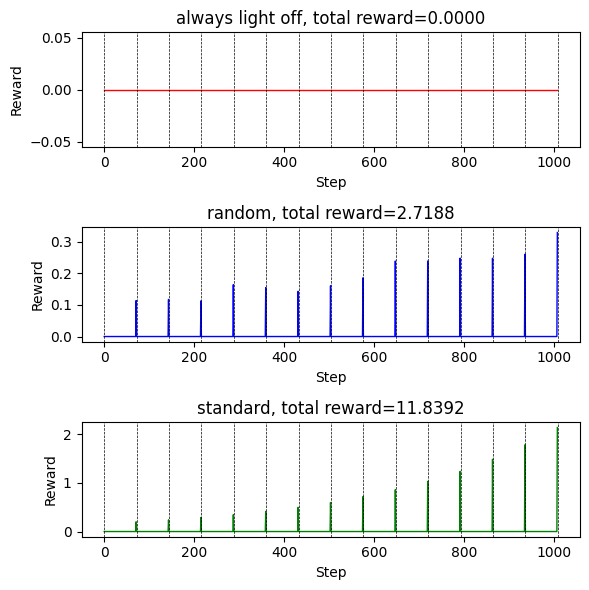

In [3]:
COLORS = ['r', 'b', 'g']
LABELS = ['always light off', 'random', 'standard']
fig, ax = plt.subplots(3, 1, figsize=(6,6))

policy1 = np.zeros(env.total_steps)
policy2 = np.random.choice([0, 1], env.total_steps)
policy3 = np.ones(env.total_steps)
policy = [policy1, policy2, policy3]

for i in range(3):
    R = []  
    State = []
    pol = policy[i]
    
    env.start()
    for _ in range(env.total_steps):
        reward, next_state, done, info = env.step(int(pol[_]))
        R.append(reward)
        State.append(env.current_state)

    R = np.array(R)
    ax[i].plot(R, linewidth=1, color=COLORS[i])
    ax[i].set_title(f'{LABELS[i]}, total reward={np.sum(R):.4f}')
    ax[i].set_xlabel('Step')
    ax[i].set_ylabel('Reward')    
    #ax[i].set_ylim(0,2.2)

for i in range(int(len(R)/env.steps_per_day)+1):
    ax[0].axvline(x = env.steps_per_day*i, color='k', linestyle='--', linewidth=0.5)
    ax[1].axvline(x = env.steps_per_day*i, color='k', linestyle='--', linewidth=0.5)
    ax[2].axvline(x = env.steps_per_day*i, color='k', linestyle='--', linewidth=0.5)

fig.tight_layout()

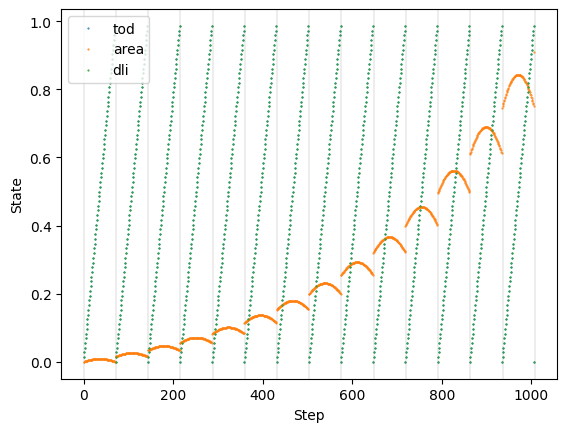

In [4]:
fig, ax = plt.subplots(1, 1)
State = np.array(State)
for i in range(int(len(R)/env.steps_per_day)+1):
    ax.axvline(x = env.steps_per_day*i, color='k', linewidth=.1)
ax.plot(State, '.', markersize=1, label=['tod','area', 'dli'])

ax.set_ylabel('State')
ax.set_xlabel('Step')
ax.legend()
#plt.xlim([72*5, 72*10])
#plt.ylim([0, 0.1])